In [1]:
# Linear Regression with one variable.

# Necessary imports

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

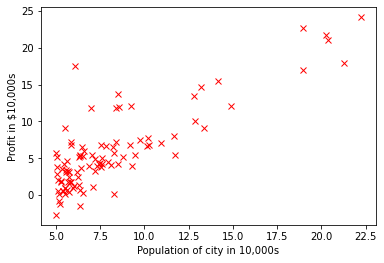

In [2]:
# Load and display

data = np.loadtxt("ex1data1.txt", delimiter = ",")
m=data.shape[0]
n=data.shape[1]-1
X=data[:,:n]
y=data[:,n]
plt.plot(X,y,'rx')
plt.xlabel('Population of city in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.show()


[[-3.25088222]] [[1.12836314]]


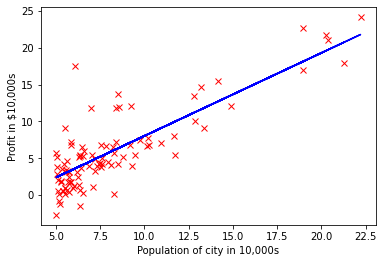

In [3]:
#Implementation of Linear regression with one variable

def calculateGradient(x, y, t0, t1, l, size):
    
    t0 = t0 - l * ((1/size) * sum([(t0 + t1 * np.array([x[i]]) - y[i]) for i in range(size)]))
    t1 = t1 - l * ((1/size) * sum([(t0 + t1 * np.array([x[i]]) - y[i]) * np.array([x[i]]) for i in range(size)]))
        
    return t0, t1

t0, t1 = 0, 0
l = 0.01
epochs = 1000

for i in range(epochs):
    t0, t1 = calculateGradient(X, y, t0, t1, l, m)

hypothesis = t0 + t1 * X
print(t0, t1)
plt.plot(X, y, 'rx')
plt.xlabel('Population of city in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.plot(X, hypothesis, color = 'blue')
plt.show()

[-3.24140214  1.1272942 ]


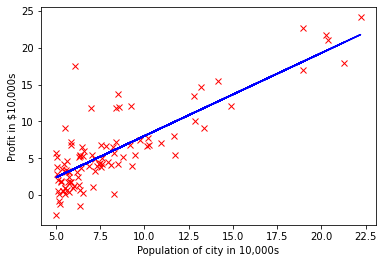

In [4]:
# Vectorized Implementation

X = np.append(np.ones((m, 1)),X,axis=1) # Adding Bias Column

def CostFunc(X,y,thetas,m):
    return (1/(2 * m)) * np.sum(np.square(np.dot(X, thetas) - y))

def VectorizedGD(X,y,learning_rate,thetas,iters,m):
    cost_iters=[]
    new_thetas=thetas.copy()
    for i in range(iters):
        new_thetas=new_thetas-(learning_rate/m)*np.dot((np.dot(X,new_thetas)-y),X)
        cost_iters.append(CostFunc(X,y,new_thetas,m))
    return new_thetas,cost_iters

thetas=np.zeros(n+1)
iters=1000
learning_rate=0.01

optimal_thetas,costs=VectorizedGD(X,y,learning_rate,thetas,iters,m)
print(optimal_thetas)
plt.plot(data[:,0], y, 'rx')
plt.xlabel('Population of city in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.plot(data[:,0], np.dot(X,optimal_thetas), color = 'blue')
plt.show()

[340412.65345227 109398.90129361  -6529.45967813]


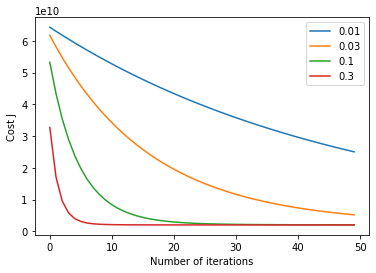

In [5]:
def Normalize(X):
    X_norm = X.copy()
    mean = np.mean(X, axis = 0)
    std = np.std(X, axis = 0)
    X_norm = (X - mean) / std
    return X_norm,mean,std

data = np.loadtxt("ex1data2.txt", delimiter = ",")
m=data.shape[0]
n=data.shape[1]-1
X=data[:,:n]
y=data[:,n]
X,mean,std=Normalize(X)
X = np.append(np.ones((m, 1)),X,axis=1)
thetas=np.zeros(n+1)
iters=50
learning_rate=0.01
optimal_thetas,costs1=VectorizedGD(X,y,learning_rate,thetas,iters,m)
learning_rate=0.03
optimal_thetas,costs2=VectorizedGD(X,y,learning_rate,thetas,iters,m)
learning_rate=0.1
optimal_thetas,costs3=VectorizedGD(X,y,learning_rate,thetas,iters,m)
learning_rate=0.3
optimal_thetas,costs4=VectorizedGD(X,y,learning_rate,thetas,iters,m)
print(optimal_thetas)


plt.plot(np.arange(len(costs1)),costs1,label="0.01")
plt.plot(np.arange(len(costs2)),costs2,label="0.03")
plt.plot(np.arange(len(costs3)),costs3,label="0.1")
plt.plot(np.arange(len(costs4)),costs4,label="0.3")
plt.legend()
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
iters=230
learning_rate=0.1
optimal_thetas,costs3=VectorizedGD(X,y,learning_rate,thetas,iters,m)

In [6]:
X_array = [1, 1650, 3]
X_array[1:3] = (X_array[1:3] - mean) / std
price = np.dot(X_array, optimal_thetas)
print("Predicted price of of a house with 1650 square feet and 3 bedrooms is: ",int(price))

Predicted price of of a house with 1650 square feet and 3 bedrooms is:  293081


In [7]:
def NormalEq(X,y):
    return np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)

data = np.loadtxt("ex1data2.txt", delimiter = ",")
m=data.shape[0]
n=data.shape[1]-1
X=data[:,:n]
y=data[:,n]
X = np.append(np.ones((m, 1)),X,axis=1)
optimal_thetas = NormalEq(X, y);
X_array = [1, 1650, 3]
price = np.dot(X_array, optimal_thetas)
print("Predicted price of of a house with 1650 square feet and 3 bedrooms using Normal Equation is: ",int(price))

Predicted price of of a house with 1650 square feet and 3 bedrooms using Normal Equation is:  293081
